In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

import colorcet as cc

In [73]:
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_columns', 500)
reviews = pd.read_csv('csv/reviews.csv')
n_comments = len(reviews['comments']) 
for i in range(20):
    if (i % 2 == 0):
        print("{} \033[48;5;66m{} \33[0;0m".format(i,reviews['comments'][i]))
    elif (i % 3 == 0):
        print("{} \33[4;33m{} \33[0;0m".format(i,reviews['comments'][i]))
    else:
        print("{} \33[1;31m{} \33[0;0m".format(i,reviews['comments'][i]))

0 Great place to stay! Definitely a tiny home, but still cozy and comfortable. Pretty fun to try it out for a couple nights for the two of us. Joe was helpful and friendly. Destinations were always less than a 20min drive and lots of parks nearby! Super fun stay :) 
1 Joe was very friendly and gave us all the information we needed. The house was exactly as described on the site. It was fun and thought provoking experiencing a 100% Eco-friendly space. We plan on staying here again next time we're in Denver! 
2 Amazing property and Joe was a great host! Even offered to walk my dog while we were out! Will definitely be back 
3 Joe was a great host, the description of this tiny house was spot on.  It was definitely a small space but well laid out and very convenient.  I would recommend a stay there. 
4 He welcomes us when we first arrived and gave great recommendations for dinner/breakfast  
5 Great tiny home. Very ECO friendly and owner is very very nice.  
6 Joe was welcoming, explained 

In [74]:
pd.reset_option('max_colwidth')


airbnb = pd.read_csv('csv/listings.csv')
airbnb_condensed = pd.read_csv('csv/listings_condensed.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,177,https://www.airbnb.com/rooms/177,20210930023319,2021-09-30,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...",https://a0.muscache.com/pictures/a1745ab2-b3a0...,615,https://www.airbnb.com/users/show/615,Joe,2008-07-07,"Denver, Colorado, United States","I'm originally from Oklahoma, but have lived i...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/905d6...,https://a0.muscache.com/im/pictures/user/905d6...,Virginia Village,2,2,"['email', 'phone', 'google', 'reviews', 'kba']",t,f,"Denver, Colorado, United States",Virginia Village,NaN,39.69551,-104.92489,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,0.0,"[""Shampoo"", ""Fire extinguisher"", ""BBQ grill"", ...",$99.00,1,400,1.0,2.0,1125.0,1125.0,1.4,1125.0,NaN,t,7,35,65,340,2021-09-30,89,22,2,2016-11-14,2021-09-24,4.81,4.97,4.85,4.97,4.93,4.84,4.77,2016-BFN-0004968,f,2,2,0,0,1.50
1,360,https://www.airbnb.com/rooms/360,20210930023319,2021-09-30,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,https://www.airbnb.com/users/show/666,Jennifer & Giovanni,2008-07-08,"Denver, Colorado, United States",We are artists and tinkerers.\n \nWe enjoy man...,within an hour,100%,93%,t,https://a0.muscache.com/im/users/666/profile_p...,https://a0.muscache.com/im/users/666/profile_p...,Highland,2,2,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Denver, Colorado, United States",Highland,NaN,39.76758,-105.00316,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,"[""Room-darkening shades"", ""Shared hot tub"", ""H...",$135.00,29,90,29.0,29.0,90.0,90.0,29.0,90.0,NaN,t,10,15,24,113,2021-09-30,166,40,0,2020-02-09,2021-08-20,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,8.30
2,364,https://www.airbnb.com/rooms/364,20210930023319,2021-09-30,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,https://www.airbnb.com/users/show/783,Jason,2008-07-11,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/783/profile_p...,https://a0.muscache.com/im/users/783/profile_p...,Five Points,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Denver, Colorado, United States",Five Points,NaN,39.76672,-104.97906,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Shampoo"", ""Fire extinguisher"

In [75]:
airbnb.shape


(3850, 74)

In [76]:


print(airbnb.isnull().sum())


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
description                                       32
neighborhood_overview                            999
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      7
host_about                                      1400
host_response_time                               680
host_response_rate                               680
host_acceptance_rate                             528
host_is_superhost                                  0
host_thumbnail_url                            

In [77]:
airbnb.dtypes
airbnb.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [78]:
print(len(airbnb['host_neighbourhood'].unique()))
print(len(airbnb['neighbourhood_cleansed'].unique()))
airbnb['host_neighbourhood'].unique()


139
78


array(['Virginia Village', 'Highland', 'Five Points', 'North Park Hill',
       'North Capitol Hill', 'Baker', 'West Highland', 'Capitol Hill',
       'Ballpark', 'Washington Park', 'South Park Hill', 'LoDo',
       'Washington Park West', 'City Park West', 'Clayton', 'City Park',
       'Stapleton', nan, 'Lowry Field', 'Platt Park', 'Sunnyside',
       'Congress Park', 'CBD', 'Berkeley', 'Lincoln Park', 'Cole',
       'Cheesman Park', 'West Colfax', 'Speer', 'University', 'Hilltop',
       'Northwest', 'Country Club', 'Cory - Merrill', 'Athmar Park',
       'Windsor', 'Gateway / Green Valley Ranch', 'Indian Creek', 'West',
       'Rosedale', 'Fort Logan', 'Skyland', 'Cimarron Foothills Estates',
       'Whittier', 'Hale', 'Washington Virginia Vale', 'Bear Valley',
       'Harvey Park', 'Central', 'Golden Triangle', 'Jefferson Park',
       'Harvey Park South', 'University Park', 'Molholm/Two Creeks',
       'Montclair', 'Goldsmith', 'Sloane Lake', 'Hampden',
       'Zona Hotelera', 'H

In [79]:
airbnb['neighbourhood'].unique()

array(['Denver, Colorado, United States', nan,
       'Englewood, Colorado, United States',
       'Lakewood, Colorado, United States',
       'Wheat Ridge, Colorado, United States',
       'Aurora, Colorado, United States',
       'Wheat ridge, Colorado, United States',
       'Stapleton, Denver, Colorado, United States',
       'Littleton, Colorado, United States',
       'Denver , Colorado, United States', 'Denver , Co, United States',
       'Edgewater, Colorado, United States'], dtype=object)

In [80]:
airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [81]:
airbnb.isnull().sum()


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
description                                       32
neighborhood_overview                            999
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      7
host_about                                      1400
host_response_time                               680
host_response_rate                               680
host_acceptance_rate                             528
host_is_superhost                                  0
host_thumbnail_url                            

In our case, the missing values that are observed do not need too much treatment. Looking into our dataset, we can state columns ‘ name’ and ‘host_name’, ‘last_review’ are irrelevant and unethical for further data exploration analysis. Therefore, we can get rid of those columns.


In [82]:
print(airbnb['name'].value_counts())
print(airbnb['host_name'].nunique()) #unique hosts


Well-kept apartment home | 2 BR in Denver            11
Textured Life | 1 BR in Denver                        9
Well-kept apartment home | 1 BR in Denver             8
Comforts of home | 1 BR in Denver                     8
Textured Life | 2 BR in Denver                        7
                                                     ..
Historic Boutique Apartment in Heart of RiNo          1
Brick Row House in LoHi ∣ Central ∣ Wifi∣ WFH         1
Great studio, with incredible views, and location     1
Modern Studio Steps from Tennyson Street              1
Sonder *Monthly Discounts* 2BR Near Hirshorn Park     1
Name: name, Length: 3735, dtype: int64
1295


In [83]:
print(airbnb['price'])
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')
airbnb['price'] = airbnb['price'].astype(float)

0        $99.00
1       $135.00
2       $179.00
3        $54.00
4        $52.00
         ...   
3845    $115.00
3846    $131.00
3847    $625.00
3848    $160.00
3849    $159.00
Name: price, Length: 3850, dtype: object


<ipython-input-83-3e59d4a0b868>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb['price'] = airbnb['price'].str.replace('$', '')


/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

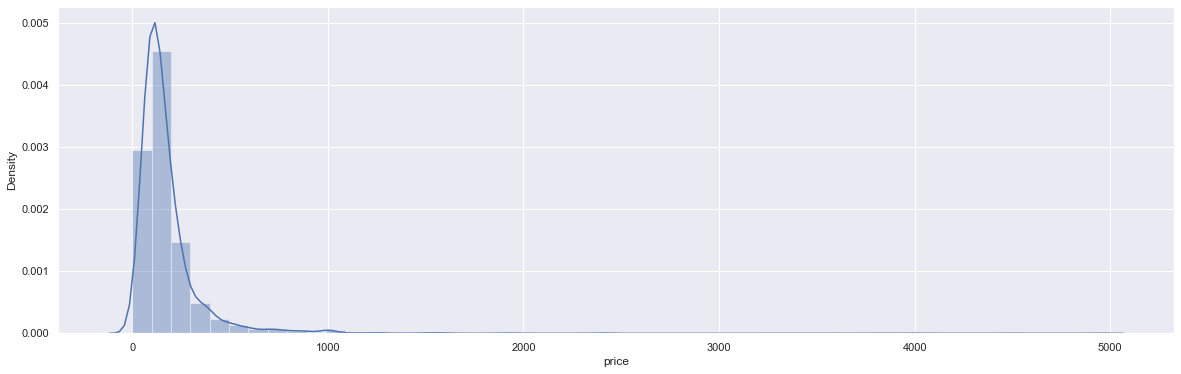

In [84]:
#distplot
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(airbnb['price'],hist=True)

74


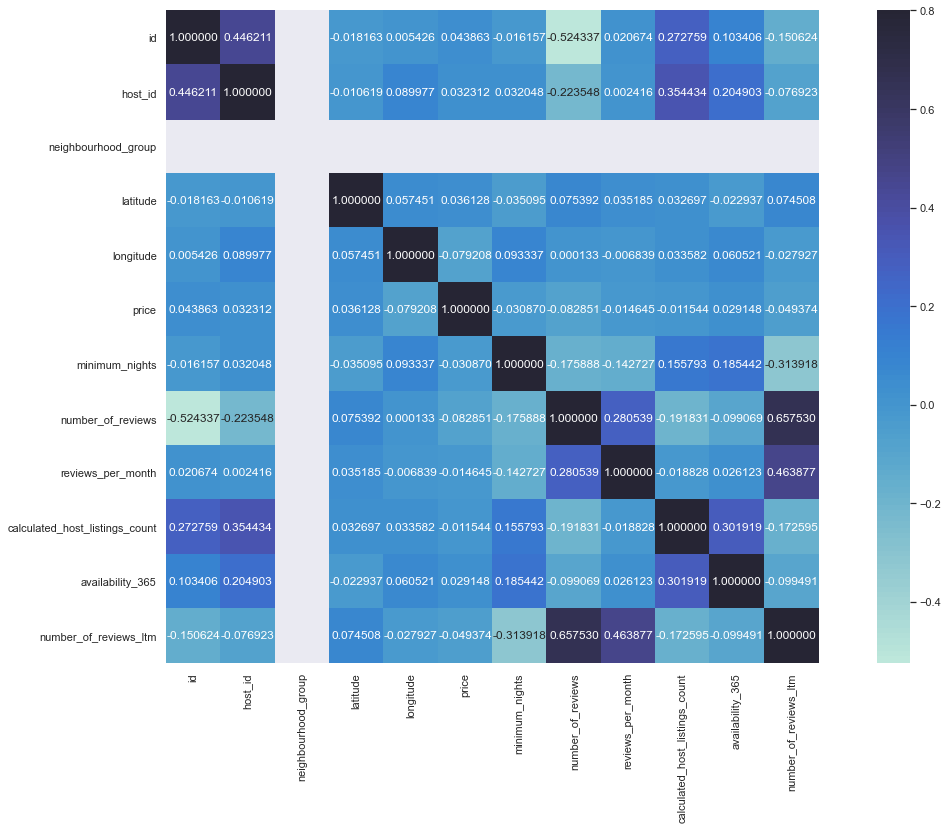

In [85]:
corrmat_condensed = airbnb_condensed.corr()

f1, ax1 = plt.subplots(figsize=(21, 12))
sns.heatmap(corrmat_condensed, vmax=.8, square=True, center=1,annot=True, fmt="f");
print(len(airbnb.columns))


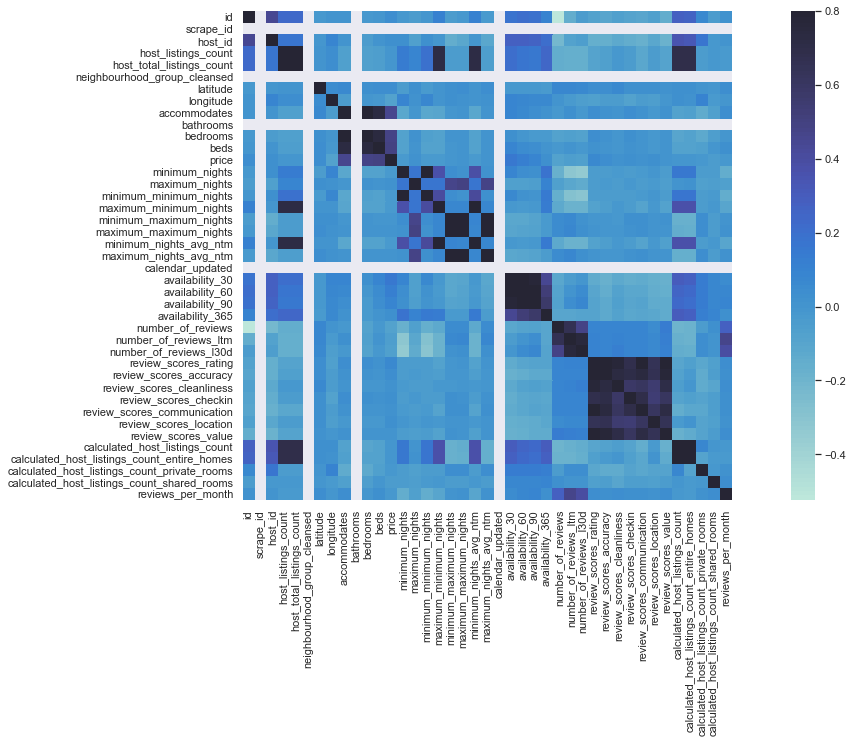

In [86]:
corrmat = airbnb.corr()
f, ax = plt.subplots(figsize=(21, 9))
sns.heatmap(corrmat, vmax=.8, square=True, center=1);

/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

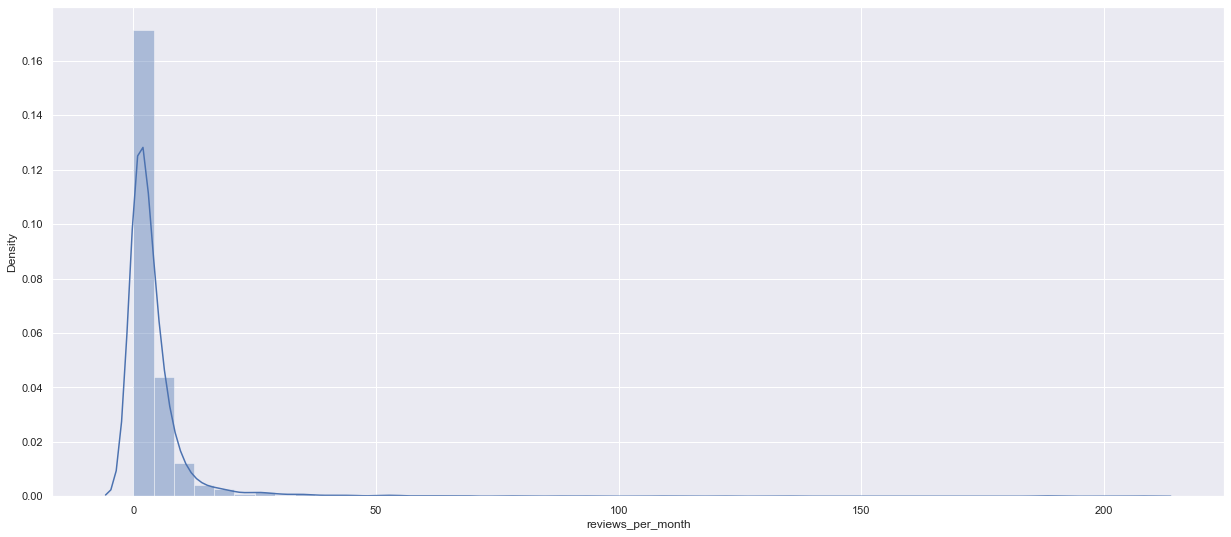

In [87]:
fig, ax = plt.subplots(figsize=(21,9))
sns.distplot(airbnb['reviews_per_month'])

In [88]:
n_unique_neighborhoods = airbnb['neighbourhood_cleansed'].unique().size
print(n_unique_neighborhoods)

78


Text(0.5, 1.0, 'Location Co-ordinates')

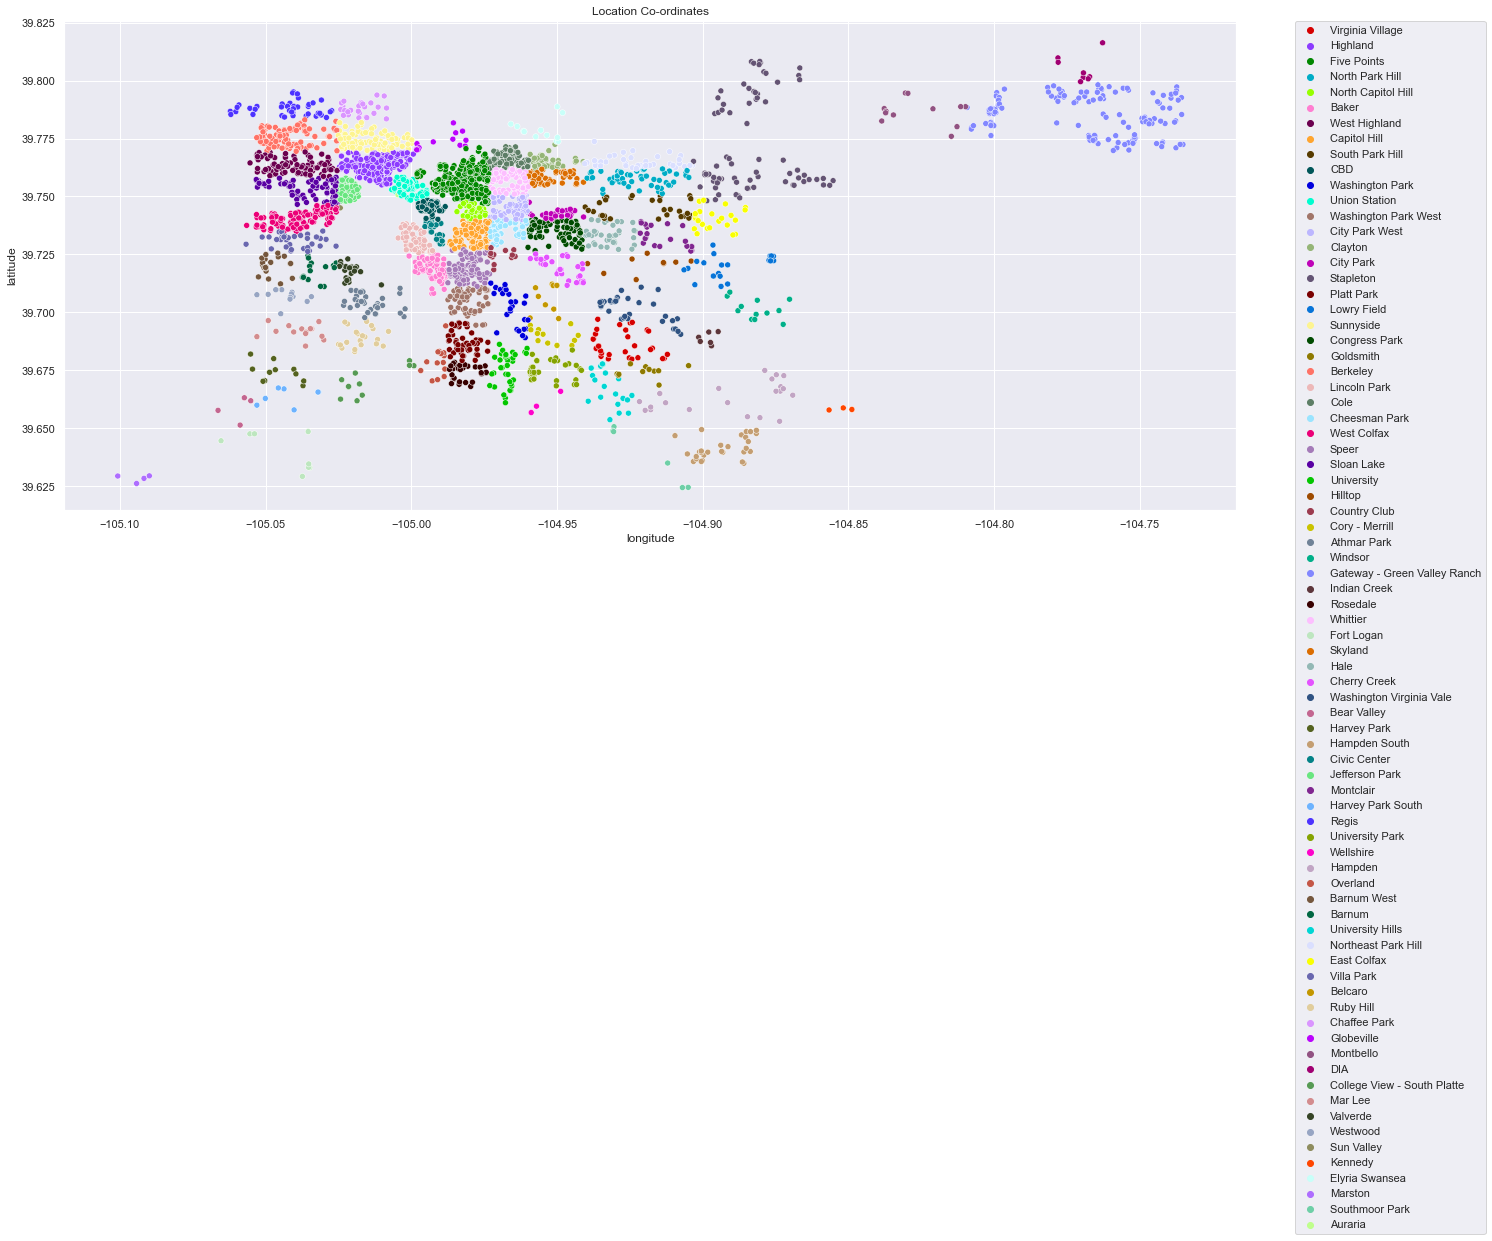

In [89]:
palette = sns.color_palette(cc.glasbey, n_colors=n_unique_neighborhoods)
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (21, 9)})
ax=sns.scatterplot(data=airbnb, x="longitude", y="latitude",hue='neighbourhood_cleansed', palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_title('Location Co-ordinates')

In [90]:
# #trying to find where the coordinates belong from the latitude and longitude
# sns.set(rc={"figure.figsize": (21, 9)})
# ax=sns.scatterplot(data=airbnb, x="longitude", y="latitude", hue='price', palette='bright')
# ax.set_title('Location Co-ordinates')

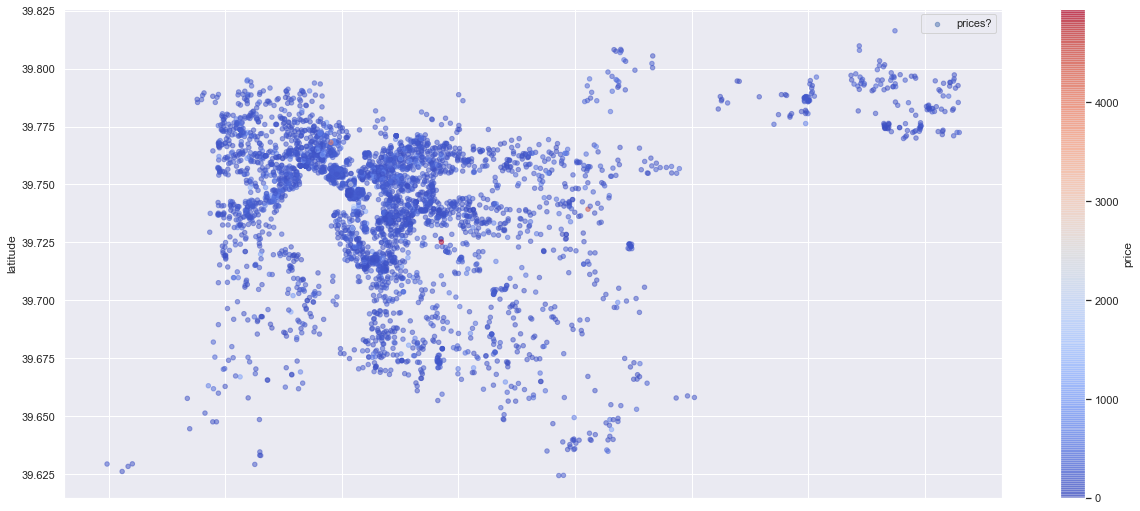

In [96]:
lat_long=airbnb.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('coolwarm'), colorbar=True, alpha=0.50, figsize=(21,9))
lat_long.legend()

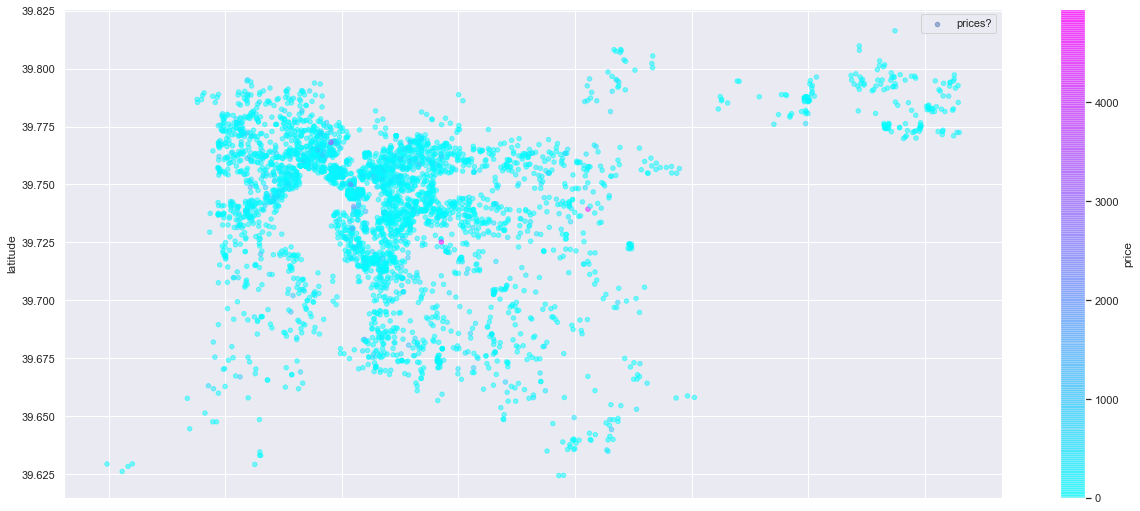

In [99]:
lat_long=airbnb.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('cool'), colorbar=True, alpha=0.50, figsize=(21,9))
lat_long.legend()

In [92]:
upper_quartile=airbnb['price'].describe()['75%']
lower_quartile=airbnb['price'].describe()['25%']
IQR = upper_quartile-lower_quartile
upper_outliers = upper_quartile + 1.5*IQR
lower_outliers = lower_quartile - 1.5*IQR 
print(lower_outliers)
print(upper_outliers)
print(airbnb['price'].describe())

-73.5
362.5
count    3850.000000
mean      178.458182
std       205.810491
min         0.000000
25%        90.000000
50%       132.000000
75%       199.000000
max      4950.000000
Name: price, dtype: float64


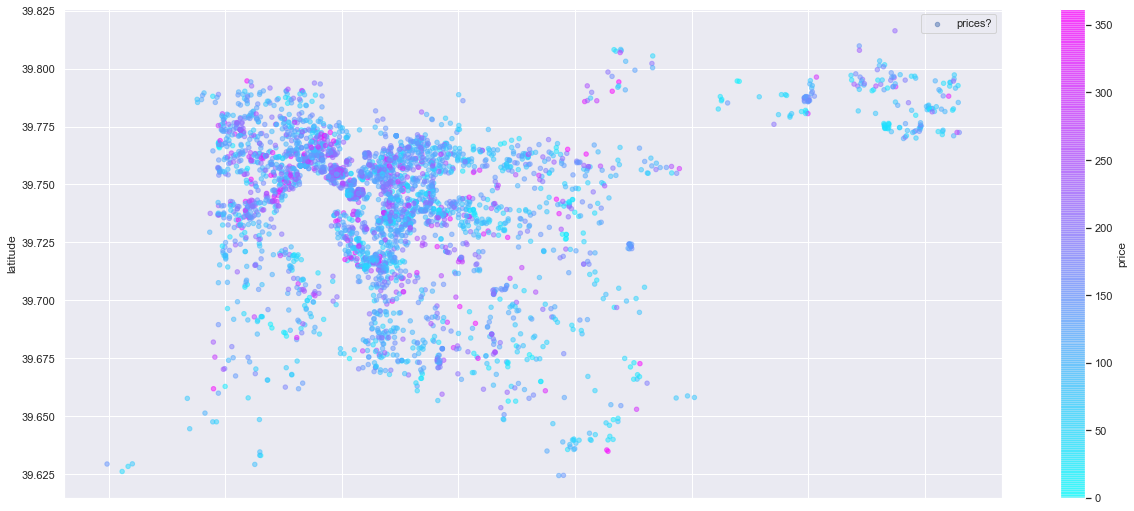

In [93]:
lat_long=airbnb[(airbnb['price'])<upper_outliers].plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('cool'), colorbar=True, alpha=0.50, figsize=(21,9))
lat_long.legend()

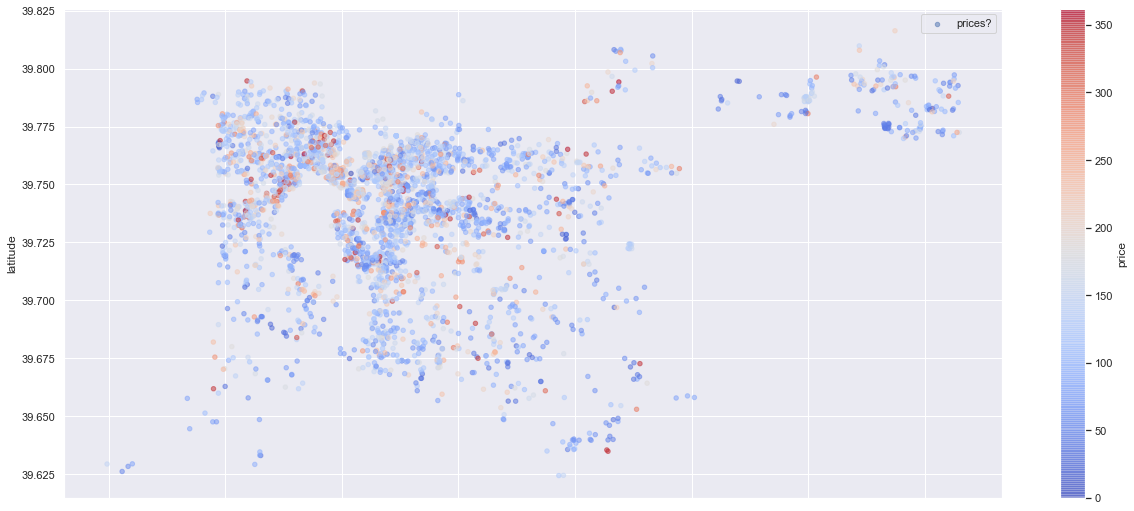

In [94]:
lat_long=airbnb[(airbnb['price'])<upper_outliers].plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('coolwarm'), colorbar=True, alpha=0.50, figsize=(21,9))
lat_long.legend()

In [95]:
print(len(airbnb[(airbnb['price'])<upper_outliers]))
print(len(airbnb['price']))

n_removed_outliers = len(airbnb['price'])-len(airbnb[(airbnb['price'])<upper_outliers])

print(n_removed_outliers)

3548
3850
302
